## Problem 1
### Part A Scatter Matrix

In [3]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [4]:
# Load data
file_path = 'DF1'
df1 = pd.read_csv(file_path)

In [3]:
# Print some different descriptions
#df1.describe()
#df1.shape
#print(df1)

#### Pandas Scatter

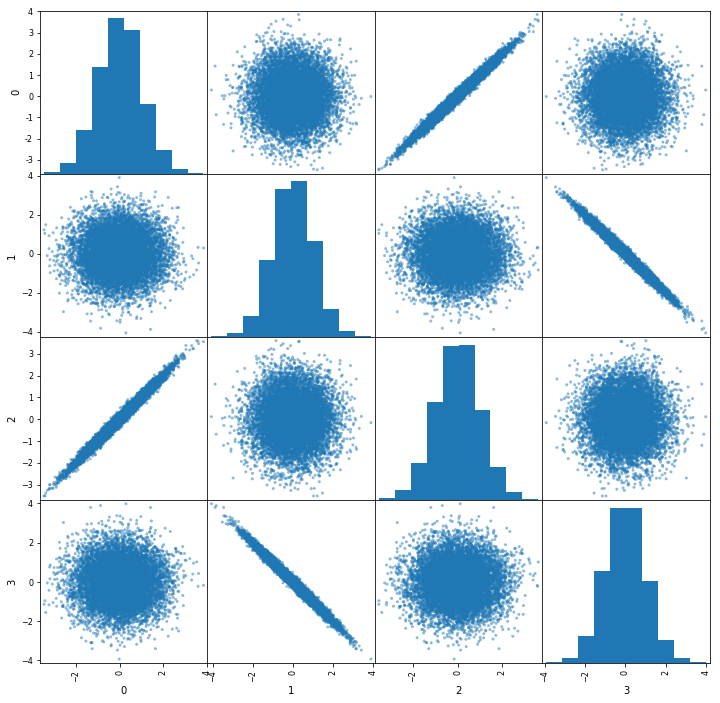

In [4]:
# Scatter matrix for the columns. Output is assigned to temporary 
# variable not to be used again due to jupyter notebook outputting
# each object otherwise.
_ = scatter_matrix(df1.iloc[:,1:], figsize=(12,12))

#### Seaborn Scatter

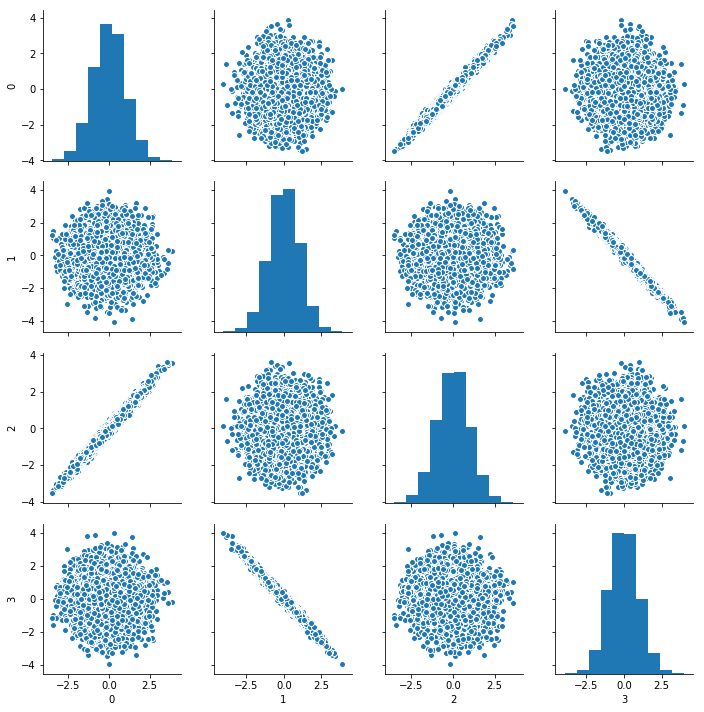

In [5]:
import seaborn as sns
_ = sns.pairplot(df1.iloc[:,1:])

### Part B Covariance Matrix
The covariance matrix for the columns is given by:


In [5]:
# Remove first column - "O Unnamed"
df_modified = df1.iloc[:,1:]
cov_matrix = df_modified.cov()
print(cov_matrix)

          0         1         2         3
0  1.001558 -0.004012  0.991624  0.004125
1 -0.004012  1.005378 -0.004099 -0.995457
2  0.991624 -0.004099  1.001589  0.004081
3  0.004125 -0.995457  0.004081  1.005168


#### Explanation
<p>
    The covariance matrix matches the scatter plots because:
    <ul>
      <li>Checking each entry of the matrix, we see the diagonal values are very close to 1. Since 
          these are the correlation of a column with itself, they better be close to 1.</li> 
      <li>For the scatter plots (0,2),(2,0), we see strong positive correlation, which is indicated 
          by the corresponding matrix entries being near 1.</li>
      <li>For the scatter plots (3,1),(1,3), we see a strong negative correlation, which is 
          indicated by the corresponding matrix entries being near -1.</li>
      <li>The remaining plots all appear to have no linear correlation, and so the corresponding 
          matrices entries have values very close to zero, as expected.</li>
    </ul>
</p>

### Part C Reverse the problem

We chose a covariance matrix s.t. the problem definition was met. We chose a correlation for $X_2$, $X_3$ of 0.94, and zeros for the entries corresponding to the uncorrelated variables. The diagonals (variances) were all ones. We plotted the covariance for the correlated entries as n grows larger.

In [6]:
mean_vector = [0,0,0]
cov_matrix = [[1,0,0],[0,1,0.94],[0,0.94,1]]
estimated = []
x = []
num_plots = 10000

for i in range(1,num_plots):
        Z = np.random.multivariate_normal(mean_vector,cov_matrix,size=10*i)
        df = pd.DataFrame(Z)
        cov = df.cov()
        estimated.append(cov.iloc[1,2])
        x.append(10*i)
        
actual = 0.94*np.ones(len(x))

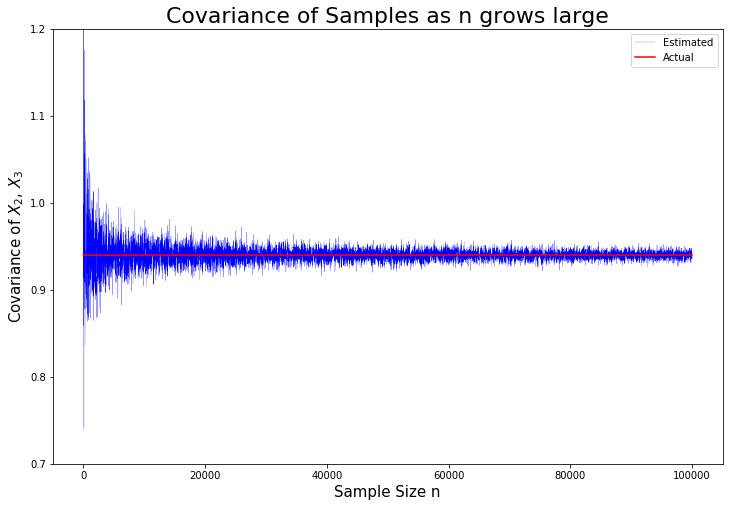

In [8]:
plt.figure(figsize=(12,8))
_ = plt.plot(x, estimated, 'b', linewidth=0.2, label='Estimated')
_ = plt.plot(x, actual, 'r', label='Actual')
_ = plt.title('Covariance of Samples as n grows large', FontSize=22)
_ = plt.xlabel('Sample Size n', FontSize=15)
_ = plt.ylabel('Covariance of $X_2$, $X_3$', FontSize=15)
plt.ylim([0.7, 1.2])
_ = plt.legend()

## Problem 2

<p>
    The most straightforward way to convert a bivariate normal with correlation to an uncorrelated standard bivariate normal is through something called a cholesky decomposition (https://blogs.sas.com/content/iml/2012/02/08/use-the-cholesky-transformation-to-correlate-and-uncorrelate-variables.html). Luckily numpy has this command built in. We decomposed the covariance matrix, then applied a change of basis. Our data was converted in this way to standard normal, allowing the outlier to be seen much clearer.
</p>

In [15]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [16]:
# Load data
file_path = 'DF2'
df = pd.read_csv(file_path)
#print(np.std(df.iloc[:,1]))
#print(np.std(df.iloc[:,2]))

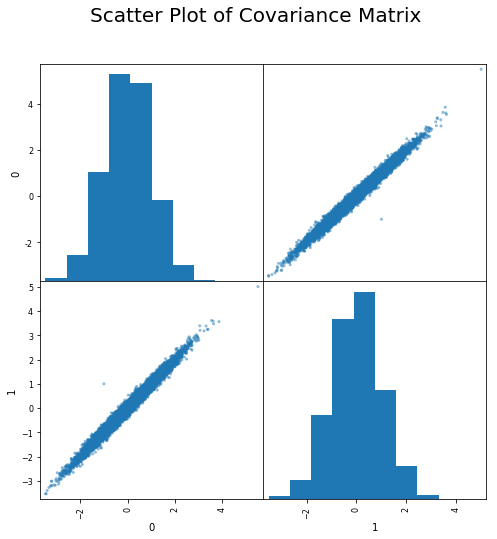

In [17]:
_ = scatter_matrix(df.iloc[:,1:], figsize=(8,8))
_ = plt.suptitle('Scatter Plot of Covariance Matrix', FontSize=20)

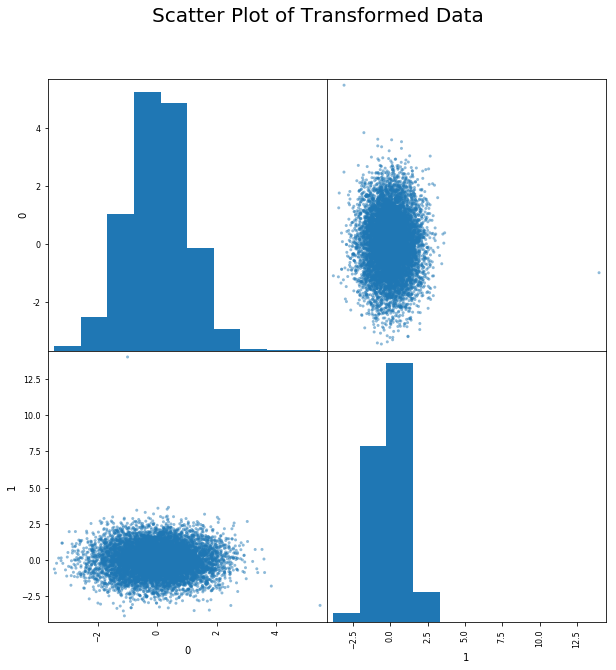

In [18]:
Z = np.array(df.iloc[:,1:])
Q = np.linalg.cholesky(df.iloc[:,1:].cov())
Q_inv = np.linalg.inv(Q.T)
Y = np.dot(Z, Q_inv)
Y = pd.DataFrame(Y)
_ = scatter_matrix(Y, figsize=(10,10))
_ = plt.suptitle('Scatter Plot of Transformed Data', FontSize=20)

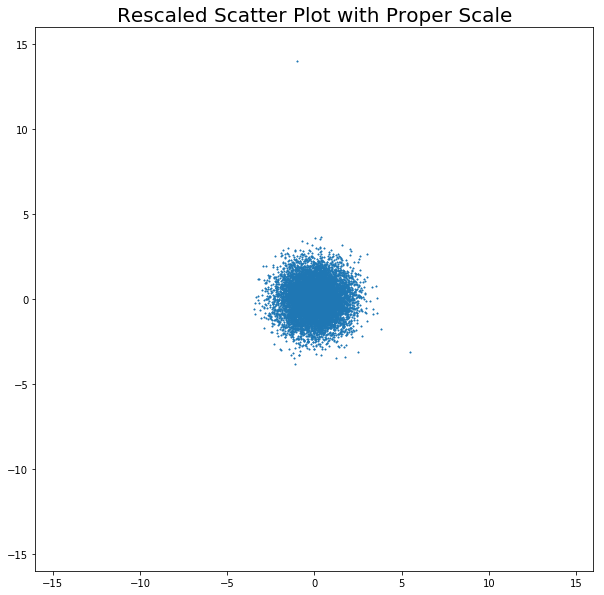

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(Y.iloc[:,0], Y.iloc[:,1], s=1.5, marker='*')
_ = plt.xlim([-16,16])
_ = plt.ylim([-16,16])
_ = plt.title('Rescaled Scatter Plot with Proper Scale', FontSize=20)

## Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 150
beta_one = 0
beta_zero = -3
beta = [beta_zero, beta_one]
error = []
#std_error = []


# We want to use the normal equations to calculate beta_hat
# Using a sample size of 150, we generate new data and record
# the error every time
for i in range(10):
    x = np.random.randn(n,)
    e = np.random.randn(n,)
    y = beta_zero + beta_one * x + e
    x_new = np.ones(len(x),)
    x_new = np.transpose(np.stack((x_new, x), axis=0))
    inv = np.linalg.inv(np.dot(x_new.T,x_new))
    beta_hat = np.dot(np.dot(inv, x_new.T), y)
    error.extend(abs(beta-beta_hat))

std_dev_error = np.std(np.array(error))

In [2]:
print(std_dev_error)

0.060995318674563793


<p>
    We can see the empirical standard deviation of the error here is 0.06. This means our value -0.15 is pretty insignificant, as it is implied to be more than two standard deviations from the mean. 
</p>
<p>
    Next we reconstruct the experiment, and allow n to get larger. We plot the values with the expected $\frac{1}{\sqrt{n}}$.
</p>

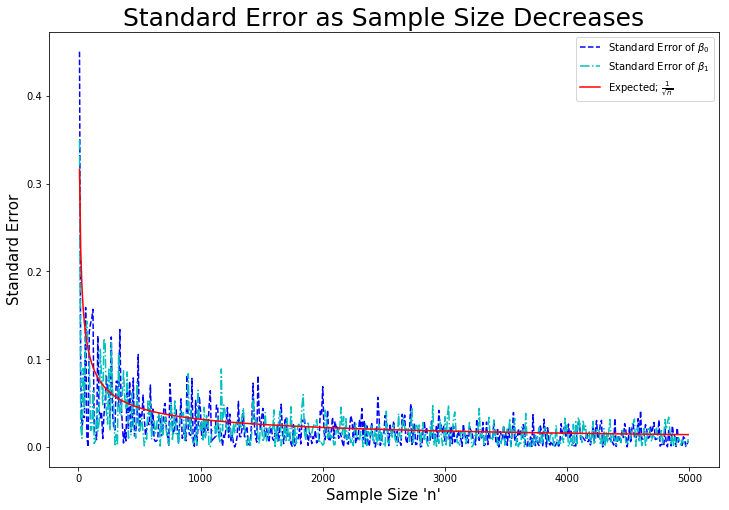

In [7]:
sample_sizes = 10*np.arange(1,500)
error_bo = []
error_b1 = []

for sample in sample_sizes:
    x = np.random.randn(sample,)
    e = np.random.randn(sample,)
    y = beta_zero + beta_one * x + e
    x_new = np.ones(len(x),)
    x_new = np.transpose(np.stack((x_new, x), axis=0))
    inv = np.linalg.inv(np.dot(x_new.T,x_new))
    beta_hat = np.dot(np.dot(inv, x_new.T), y)
    error_bo.append(abs(beta[0]-beta_hat[0]))
    error_b1.append(abs(beta[1]-beta_hat[1]))

fig = plt.figure(figsize=(12,8))
plt.plot(sample_sizes, error_bo, 'b--', label=r'Standard Error of $\beta_0$')
plt.plot(sample_sizes, error_b1, 'c-.', label=r'Standard Error of $\beta_1$')
plt.plot(sample_sizes, 1./np.sqrt(sample_sizes), 'r', label=r'Expected; $\frac{1}{\sqrt{n}}$')
plt.xlabel('Sample Size \'n\'', FontSize = 15)
plt.ylabel('Standard Error', FontSize = 15)
plt.title('Standard Error as Sample Size Decreases', FontSize=25)
_ = plt.legend()

## Problem 4
Write a program that on input k and XXXX, returns the top k names from year
XXXX.
<p>Write a program that on input Name returns the frequency for men and women of the
name Name.</p>
<p>It could be that names are more diverse now than they were in 1880, so that a name
may be relatively the most popular, though its frequency may have been decreasing over
the years. Modify the above to return the relative frequency.</p>
<p>Find all the names that used to be more popular for one gender, but then became more
popular for another gender.</p>
<p>(Optional) Find something cool about this data set.</p>

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import os

In [45]:
# Load data
file_path = "/home/humble-fool/school_work/Spring_18/Data-Science-Lab-ee379k/lab2/src/Names/"
#Getting data for first Data Frame
file_name = "yob" + str(1880) + ".txt"
names=pd.DataFrame(pd.read_csv((file_path + file_name), names = ["name", "sex","freq"]))
#adding year column
names['year'] = 1880

## loading rest of the data, adding year column and appending it to names data frame
for years in range(1881,2016):
    year = years
    new_df = pd.DataFrame(pd.read_csv((file_path+"yob"+str(year)+".txt"),names = ["name","sex","freq"]))
    new_df['year'] = year
    names = names.append(new_df,ignore_index=True)
print(names.head())

        name sex  freq  year
0       Mary   F  7065  1880
1       Anna   F  2604  1880
2       Emma   F  2003  1880
3  Elizabeth   F  1939  1880
4     Minnie   F  1746  1880


In [35]:
# takes number as k from the problem description and year
# returns the top k names from the particular year

def top_k_names(num,year):
    temp_dataframe = names[names['year']==year]
    s = pd.Series(temp_dataframe.groupby('name')['freq'].sum())
    return s.nlargest(num)
    
#testing top_k_names
print(top_k_names(10,2015))

name
Emma        20365
Noah        19648
Olivia      19561
Liam        18302
Sophia      17341
Mason       16626
Ava         16305
Jacob       15838
William     15824
Isabella    15525
Name: freq, dtype: int64


In [66]:
# This function takes name as input and calculates frequency of the particular name across the entire years
# returns the freq categorized by sex
def freq_name(name):
    temp_data_frame = names[names['name']==name]
    #getting only males and summing up freq column
    temp_data_frame_male = temp_data_frame[temp_data_frame['sex']=="M"]
    male_freq = temp_data_frame_male['freq'].sum()

    #getting only females and summing up freq column
    temp_data_frame_female = temp_data_frame[temp_data_frame['sex']=="F"]
    female_freq = temp_data_frame_female['freq'].sum()
        
    dict_rt = {"Number of males" :male_freq, "Number of Females":female_freq}
    return dict_rt

print(freq_name("Emma"))

{'Number of Females': 614505, 'Number of males': 1585}


In [44]:
#This function takes name and year
#Returns a dictionary containing relative frequency of the specified name in the year with respective gender 
def rel_freq(name,year):
    temp_dataframe_year = names[names['year']==year]
    print(temp_dataframe_year.shape)
    temp_df_name = temp_dataframe_year[temp_dataframe_year['name']==name]
    
    
    #getting only males and summing up freq column
    temp_df_male = temp_df_name[temp_df_name['sex']=="M"]
    male_freq = temp_df_male['freq'].sum()
    total_male_freq = temp_dataframe_year[temp_dataframe_year['sex']=='M']['freq'].sum()
    
    relative_male_freq = male_freq/total_male_freq

    #getting only females and summing up freq column
    
    temp_df_female = temp_df_name[temp_df_name['sex']=="F"]
    female_freq = temp_df_female['freq'].sum()
    
    total_freq_fem = temp_dataframe_year[temp_dataframe_year['sex']=='F']['freq'].sum()
    
    relative_fem_freq = female_freq/total_freq_fem
    dict_key1 = "Relative frequence of males with "+name+" in year "+str(year)
    dict_key2 = "Relative frequency of females with "+name+" in year "+str(year)
    dict_rt = {dict_key1 :relative_male_freq, dict_key2:relative_fem_freq}
    return dict_rt

#testing for relative frequency
print(rel_freq("Emma",2015))

(32952, 4)
{'Relative frequence of males with Emma in year 2015': 5.266323232174286e-06, 'Relative frequency of females with Emma in year 2015': 0.011504387266330381}


In [51]:
def rel_freq_list(name,year):
    temp_dataframe_year = names[names['year']==year]
    print(temp_dataframe_year.shape)
    temp_df_name = temp_dataframe_year[temp_dataframe_year['name']==name]
    
    
    #getting only males and summing up freq column
    temp_df_male = temp_df_name[temp_df_name['sex']=="M"]
    male_freq = temp_df_male['freq'].sum()
    total_male_freq = temp_dataframe_year[temp_dataframe_year['sex']=='M']['freq'].sum()
    
    relative_male_freq = male_freq/total_male_freq

    #getting only females and summing up freq column
    
    temp_df_female = temp_df_name[temp_df_name['sex']=="F"]
    female_freq = temp_df_female['freq'].sum()
    
    total_freq_fem = temp_dataframe_year[temp_dataframe_year['sex']=='F']['freq'].sum()
    
    relative_fem_freq = female_freq/total_freq_fem
    return [relative_fem_freq,relative_male_freq]
rel_freq_list('Emma',2015)[0]

(32952, 4)


0.011504387266330381

In [1]:
# Algorithm
# for each name
    # for each year
    # calculate rel freq for males
    # calculate rel freq for females
    # subract them and add it to a list called differences
# check if differences has a root (goes from negative to positive or vice versa)
# if yes, then add the name to a list
# then go to next name

# Commented out to supress output
'''
changing_popularity = []

df_name = names.drop_duplicates('name')
for name in df_name['name']:
    difference = []
    for year in range(1880,2016):
        relative_frequencies = rel_freq_list(name,year)
        fem_rel_freq = relative_frequencies[0]
        male_rel_freq = relative_frequencies[1]
        difference.append((fem_rel_freq-male_rel_freq))
    time = np.arange(0, len(difference))
    function = np.polyfit(time, difference,deg =2)
    roots = np.roots(function)
    real_roots = roots[np.isreal(roots)]
    if(len(real_roots) != 0):
        changing_popularity.append(name)
     
print(changing_popularity)
    '''
        
        
    
    

"\nchanging_popularity = []\n\ndf_name = names.drop_duplicates('name')\nfor name in df_name['name']:\n    difference = []\n    for year in range(1880,2016):\n        relative_frequencies = rel_freq_list(name,year)\n        fem_rel_freq = relative_frequencies[0]\n        male_rel_freq = relative_frequencies[1]\n        difference.append((fem_rel_freq-male_rel_freq))\n    time = np.arange(0, len(difference))\n    function = np.polyfit(time, difference,deg =2)\n    roots = np.roots(function)\n    real_roots = roots[np.isreal(roots)]\n    if(len(real_roots) != 0):\n        changing_popularity.append(name)\n     \nprint(changing_popularity)\n    "

The cell above should return a list of the names that changed in popularity over time. Our algorithm took longer to run than we expected, and we did not start running it until it was too late. We had to compile the assignment and turn it in.

## Problem 5


In [1]:
import pandas as pd

In [16]:
tweets = pd.read_csv("/home/humble-fool/school_work/Spring_18/Data-Science-Lab-ee379k/lab2/src/tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [3]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie"in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

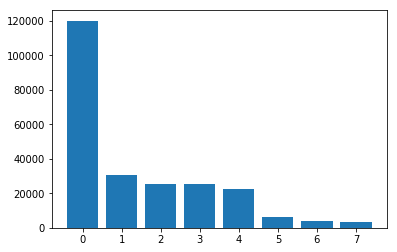

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [5]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)),counts)
plt.show()
print(counts)

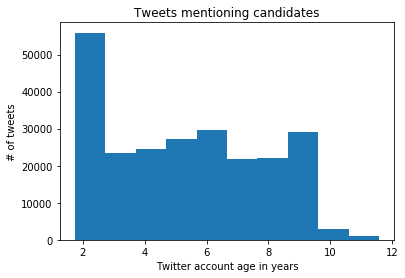

In [6]:
from datetime import datetime
tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])
tweets["user_age"] = tweets["user_created"].apply(lambda x:(datetime.now()-x).total_seconds()/3600/24/365)
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

/home/humble-fool/school_work/Spring_18/Data-Science-Lab-ee379k/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


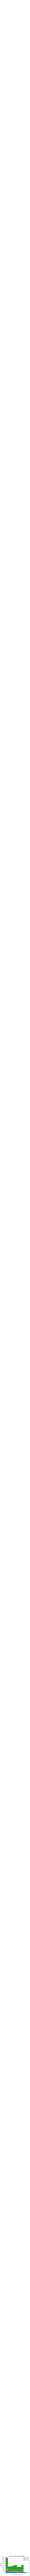

In [7]:
clinton_tweets = tweets["user_age"][tweets["candidate"]=="clinton"]
sanders_tweets = tweets["user_age"][tweets["candidate"]=="sanders"]
trump_tweets = tweets["user_age"][tweets["candidate"]=="trump"]
plt.hist([clinton_tweets,sanders_tweets,trump_tweets],stacked = True,
       label = ["clinton","sanders","trump"])
plt.legend()
plt.title("tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate("More Trump tweets",xy=(1,35000),xytext = (2,35000),arrowprops=dict(facecolor='black'))
plt.show()

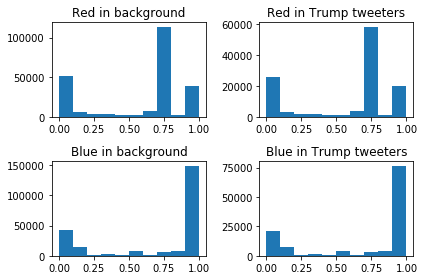

In [8]:
import matplotlib.colors as colors
tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])
fig,axes = plt.subplots(nrows=2,ncols=2)
ax0, ax1, ax2, ax3 = axes.flat
ax0.hist(tweets["red"])
ax0.set_title("Red in background")

ax1.hist(tweets["red"][tweets["candidate"]=="trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title("Blue in background")

ax3.hist(tweets["blue"][tweets["candidate"]=="trump"].values)
ax3.set_title("Blue in Trump tweeters")

plt.tight_layout()
plt.show()

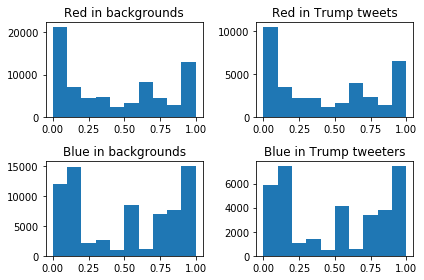

In [9]:
tweets["user_bg_color"].value_counts()
tc = tweets[~tweets["user_bg_color"].isin(['C0DEED','000000','F5F8FA'])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

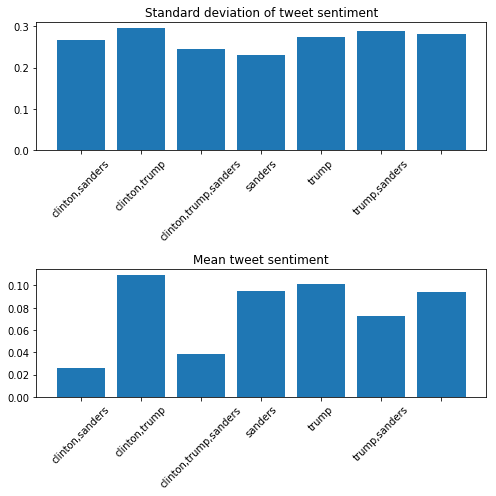

In [10]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()


In [11]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

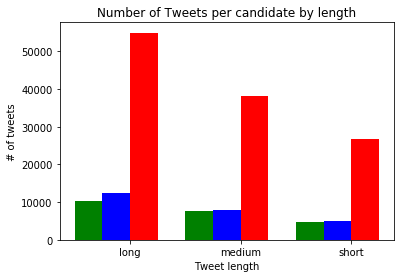

In [12]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()



In [15]:
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia',
          'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts',
          'Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey',
          'New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
          'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia',
          'Wisconsin','Wyoming','al','ak','az','ar','ca','co','ct','de','fl','ga','hi','id','il','in','ia','ks',
          'ky','la','me','md','ma','mi','mn','ms','mo','mt','ne','nv','nh','nj','nm','ny','nc','nd','oh','ok','or',
          'pa','ri','sc','sd','tn','tx','ut','vt','va','wa','wv','wi','wy'
]
states_lower=[]
for state in states:
    states_lower.append(state.lower())
print(states_lower)

['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming', 'al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 'nc', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy']


In [18]:
def get_state(row):
    state = []
    text = str(row["user_location"]).lower()
    if "alabama" in text or "al" in text:
        state.append("alabama")
    if "alaska" in text or "ak" in text:
        state.append("alaska")
    if "arizona" in text or "az"in text:
        state.append("arizona")
    if "arkansas" in text or "ar"in text:
        state.append("arkansas")
    if "california" in text or "ca"in text:
        state.append("california")
    if "colorado" in text or "co"in text:
        state.append("colorado")
    if "connecticut" in text or "ct"in text:
        state.append("connecticut")
    if "delaware" in text or "de"in text:
        state.append("delaware")
    if "florida" in text or "fl"in text:
        state.append("florida")
    if "georgia" in text or "ga"in text:
        state.append("georgia")
    if "hawaii" in text or "hi"in text:
        state.append("arizona")
    if "idaho" in text or "id"in text:
        state.append("idaho")
    if "illinois" in text or "il"in text:
        state.append("illinois")
    if "indiana" in text or "in"in text:
        state.append("indiana")
    if "iowa" in text or "ia"in text:
        state.append("iowa")
    if "kansas" in text or "ks"in text:
        state.append("kansas")
    if "kentucky" in text or "ky"in text:
        state.append("ky")
    if "louisiana" in text or "la"in text:
        state.append("louisiana")
    if "maine" in text or "me"in text:
        state.append("maine")
    if "maryland" in text or "md"in text:
        state.append("maryland")
    if "massachusetts" in text or "ma"in text:
        state.append("massachusetts")
    if "michigan" in text or "mi"in text:
        state.append("michigan")
    if "minnesota" in text or "mn" in text:
        state.append("minnesota")
    if "mississippi" in text or "ms"in text:
        state.append("mississipii")
    if "missouri" in text or "mo"in text:
        state.append("missouri")
    if "montana" in text or "mt"in text:
        state.append("montana")
    if "nebraska" in text or "ne"in text:
        state.append("nebraska")

    if "nevada" in text or "nv"in text:
        state.append("nevada")
    if "new hampshire" in text or "nh"in text:
        state.append("new hampshire")
    if "new jersey" in text or "nj"in text:
        state.append("new jersey")
    if "new mexico" in text or "nm"in text:
        state.append("new mexico")
    if "new york" in text or "ny"in text:
        state.append("new york")
    if "north carolina" in text or "nc"in text:
        state.append("north carolina")
    if "north dakota" in text or "nd"in text:
        state.append("north dakota")
    if "ohio" in text or "oh"in text:
        state.append("ohio")
    if "oklahoma" in text or "ok"in text:
        state.append("oklahoma")
    if "oregon" in text or 'or' in text:
        state.append('oregon')
    if "pennsylvania" in text or "pa"in text:
        state.append("pennsylvania")
    if "rhode island" in text or "ri"in text:
        state.append("rhode island")
    if "south carolina" in text or "sc"in text:
        state.append("south carolina")
    if "south dakota" in text or "sd"in text:
        state.append("south dakota")
    if "tennessee" in text or "tn"in text:
        state.append("tennesse")
    if "texas" in text or 'tx' in text:
        state.append("texas")
    if "utah" in text or "ut"in text:
        state.append("utah")
    if "vermont" in text or "vt"in text:
        state.append("vermont")
    if "virginia" in text or "va"in text:
        state.append("virginia")
    if "washington" in text or "wa"in text:
        state.append("washington")
    if "west virginia" in text or "wv"in text:
        state.append("west virginia")
    if "wisconsin" in text or 'wi' in text:
        state.append('wisconsin')
    if "wyoming" in text or "wy"in text:
        state.append("wyoming")        
    return ",".join(state)

tweets["state"] = tweets.apply(get_state,axis=1)

Other possible strategies are to inference state location using geographical co-ordinates and also compile data using cities and use some api to possibly check if it falls within any of the US states. Another possible strategy is to use hashtags to add data to the users for which location is missing

In [19]:
print(tweets['state'].count())

237480


We were able to classify 237480 tweets with above written classifier

# Written Problems

## Problem 1
### Part A
<body>
    <h3>We want to calculate: </h3> 

   <p>$$Pr\,(\bar{z} \geq {c})$$ </p>
   <p>$$ = Pr\,(\bar{z} - \mu \geq {c-\mu})$$</p>
   <p>$$ = Pr\,(\frac{\bar z -\mu}{\sigma_{\bar z}} \geq \frac{c-\mu}{\sigma_{\bar z}})$$</p>
   <p>$$ \sigma_{\bar z} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{n}}$$</p>
   <p>$$ = Pr\,(z_{avg} \geq c \sqrt{n})$$</p>
   
   <p> We want to calculate this probability for different values of c as given in the problem, namely:</p>
   <p>$$c_1 = 0.1$$</p>
   <p>$$c_2 = 0.01$$</p>
   <p>$$c_3 = 0.001$$</p>
   <p> We can use the cdf of the standard normal $\Phi(z)$. We know that $F_z(z) = \Phi(z) = Pr(Z \leq z)$ </p>
   <p> Therefore, we need to calculate $1 \,\, - \,\, \Phi(z)$ for $z = c_1\sqrt{n}$, etc. </p>
   <p> Leaving them in "z-score" format:</p>
   <ol>
    <li>$$1\,\,-\,\,\Phi(10)$$</li>
    <li>$$1\,\,-\,\,\Phi(1)$$</li>
    <li>$$1\,\,-\,\,\Phi(0.1)$$</li>
   </ol>
</body>

### Part B
<body>
   <p>$$Pr\,(\bar{z} \geq {n^c})$$ </p>
   <p>$$ = Pr\,(\bar{z} - \mu \geq {n^c-\mu})$$</p>
   <p>$$ = Pr\,(\frac{\bar z -\mu}{\sigma_{\bar z}} \geq \frac{n^c-\mu}{\sigma_{\bar z}})$$</p>
   <p>$$ \sigma_{\bar z} = \frac{\sigma}{\sqrt{n}}$$</p>
   <p>$$ = Pr\,(z_{avg} \geq \frac{n^c \sqrt{n}}{\sigma})$$</p>
    
   <p> We want to calculate this probability for different values of c as given in the problem, namely:</p>
   <p>$$c_1 = \frac{-1}{3}$$</p>
   <p>$$c_2 = \frac{-1}{2}$$</p>
   <p>$$c_3 = \frac{-2}{3}$$</p>
   <p> We can use the cdf of the standard normal $\Phi(z)$. We know that $F_z(z) = \Phi(z) = Pr(Z \leq z)$ </p>
   <p> Therefore, we need to calculate $1 \,\, - \,\, \Phi(z)$ </p>
   <p> Leaving them in "z-score" format:</p>
   <ol>
    <li>$$1\,\,-\,\,\Phi(n^{\frac{-1}{3}})$$</li>
    <li>$$1\,\,-\,\,\Phi(n^{\frac{-1}{2}})$$</li>
    <li>$$1\,\,-\,\,\Phi(n^{\frac{-2}{3}})$$</li>
   </ol>
    
</body>

## Problem 2

### Part A
<body>
   Show that $ argmin(\beta) : \frac{1}{n} \sum_i^n(x_i \beta - y_i)^2 $ has form:
      <p>$$ A\beta^{2} + B\beta + C $$</p>
   
   First we expand:
      <p>$$\frac{1}{n} [\sum_i^n((x_i\beta)^2-2x_iy_i\beta + y_{i}^{2})]$$</p>
   Moving the sum inside:   
      <p>$$\Rightarrow (\frac{1}{n}\sum_i^n x_i^2)\beta^2 + (\frac{-2}{n}\sum_i^nx_iy_i)\beta + (\frac{1}{n}\sum_i^n y_i^2)$$</p>

   Now we can see that:
      <p>$$A(x_i,y_i) = \frac{1}{n}\sum_i^n x_i^2$$</p>
      <p>$$B(x_i,y_i) = \frac{-2}{n}\sum_i^nx_iy_i$$</p>
      <p>$$C(x_i,y_i) = \frac{1}{n}\sum_i^n y_i^2$$</p>
</body>

### Part B
<body>
   To show that A is always positive, we simply observe that $n > 1$, and assuming $x_i \in \bf{R}$, any real number times itself is always non-negative. Then a sum of non-negative real numbers is also non-negative. Therefore we cannot have $A < 0$ .
</body>

### Part C
<body>
   We take the derivative with respect to $\beta$ and set the equation equal to zero to find the solution to our original problem, $ argmin(\beta) : \frac{1}{n} \sum_i^n(x_i \beta - y_i)^2 $.
   <p>
      $$\bigtriangledown_{\beta}[\frac{1}{n} \sum_i^n(x_i \beta - y_i)^2] = 0$$
   </p>
   <p>
      $$\Rightarrow\frac{2}{n}\sum_i^nx_i^2\beta - \frac{2}{n}\sum_i^ns_iy_i = 0$$
   </p>
   <p>
      $$\Rightarrow\sum_i^nx_i^2\beta = \sum_i^nx_iy_i$$
   </p>
   <p>
      $$\Rightarrow\beta = \sum_i^n(\frac{x_iy_i}{x_i^2}) = \frac{\pmb{x}^T\cdot\pmb{y}}{\|x\|_2^2}$$
   </p>
</body>

### Part D
<body>
   <p>
        Now we assume some error vector $\pmb{e}$ ($\pmb{e} = (e_1, e_2, ... , e_n)$), and find out what our new $\beta$ is (denoted by $\hat{\beta}$).
   </p>
   <p>
       We are given that $\hat{\beta} = \beta + \pmb{Z}\pmb{e}$ and that $y_i^{*} = x_i\beta + e_i$. We plug in $y_i^{*}$ to $\beta$ and solve for $\hat{\beta}$ .
   <p>
      $$\Rightarrow \hat{\beta} = \sum_i^n\frac{x_i(x_i\beta + e_i)}{x_i^2} = \sum_i^n\frac{x_i}{x_i}\beta + \sum_i^n\frac{x_i e_i}{x_i^2}$$
   </p>
   <p>
      $$\Rightarrow \hat{\beta} = \beta + \sum_i^n\frac{1}{x_i}e_i$$
   </p>
   <p>
      $$\Rightarrow \hat{\beta} = \beta + \frac{\pmb{x}}{\pmb{x}^T\pmb{x}}\pmb{e}$$
   </p>

   <p>
      $$\vec{z} = \frac{\pmb{x}}{\|\pmb{x}\|_2^2} $$
   </p>

</body>

### Bonus
<body>
   <p>
      In the general case, we have:
   </p>
   <p>
      $$\bigtriangledown_\beta\,\, \frac{1}{n} \|\hat{\pmb{y}}\,\, -\,\, \pmb{y}\|_2^2 \,\,=\,\, 0$$
   </p>
   <p>
      $$\Rightarrow\frac{1}{n} \bigtriangledown_\beta\,\, \|\pmb{X}\beta \,\,-\,\, \pmb{y}\|_2^2\,\, = \,\,0$$
   </p>
   <p>
      $$\Rightarrow \bigtriangledown_\beta \,\,(\pmb{X}\beta - \pmb{y})^{T})\,(\pmb{X}\beta - \pmb{y})\,\, =\,\, 0$$
   </p>
   <p>
      $$\Rightarrow \bigtriangledown_\beta \,\,(\beta^T\pmb{X}^T\pmb{X}\beta\,\, -\,\, 2\beta^T\pmb{X}^T\pmb{y}\,\, + \,\,\pmb{y}^T\pmb{y})\,\, =\,\, 0$$
   </p>
   <p>
      $$\Rightarrow \,\, 2 \pmb{X}^T \pmb{X} \beta \,\, - \,\, 2 \pmb{X}^T \pmb{y} \,\, = \,\, 0$$
   </p>
   <p>
      $$\Rightarrow \,\, \beta \,\, = \,\, (\pmb{X}^T \pmb{X})^{-1} \, \pmb{X}^T \pmb{y}$$
   </p>